<a href="https://colab.research.google.com/github/Abius360/Data_Analysis_Challenge_Olist_Dataset/blob/main/data_analysis_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets

In [27]:
#Customer dataset
customer_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAC/olist_customers_dataset.csv(0)")

In [28]:
#Seller dataset
seller_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAC/olist_sellers_dataset.csv")

In [29]:
#Product dataset
product_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAC/olist_products_dataset.csv")

In [30]:
#Geolocation dataset
geo_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAC/olist_geolocation_dataset.csv")

In [31]:
#Order dataset
order_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAC/olist_orders_dataset.csv")

In [32]:
#Order_item dataset
item_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAC/olist_order_items_dataset.csv")

In [33]:
#Order_payment data set
payment_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAC/olist_order_payments_dataset.csv")

In [34]:
#Order Review
review_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAC/olist_order_reviews_dataset.csv")

# Check if there are missing values

In [11]:
data = [customer_df, seller_df, product_df,geo_df, order_df,item_df, payment_df, review_df]
for dataframe in data:
    missing_value = dataframe.isnull().sum()
    print(missing_value)

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_d

There are missing values in 3 datasets;
Product, Order and Review datasets

# Cleaning the datasets

In [12]:
# Cleaning the product datasets
product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [13]:
product_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [14]:
product_df["product_category_name"].unique()
product_df["product_category_name"].nunique()

73

In [15]:
product_df["product_category_name"].mode()

0    cama_mesa_banho
Name: product_category_name, dtype: object

In [16]:
product_df.sort_values("product_category_name")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5964,4796ab0f0b86b1d3aeea60f77a0ad991,agro_industria_e_comercio,44.0,755.0,1.0,300.0,20.0,20.0,20.0
26190,6ff1fc9209c7854704a4f75c9fac41b4,agro_industria_e_comercio,59.0,489.0,2.0,233.0,16.0,5.0,13.0
28803,5b951e54437768080925aabe01e24348,agro_industria_e_comercio,54.0,747.0,1.0,380.0,22.0,11.0,14.0
28144,f3c179e260e0eeffbe02340259404cb1,agro_industria_e_comercio,50.0,2653.0,1.0,1200.0,25.0,10.0,16.0
16284,0a0adf0de1769b2970f3096d0b5abfb7,agro_industria_e_comercio,47.0,418.0,1.0,13325.0,41.0,42.0,47.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [17]:
#Replace the Missing category name in the column
product_df = product_df.fillna(method = "ffill")
product_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [18]:
#Clean the Order datasets
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [19]:
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [20]:
order_df = order_df.fillna(method = "ffill")
order_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [21]:
#Clean the review data set
review_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [22]:
review_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [23]:
review_df = review_df.dropna()
review_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [24]:
review_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02
...,...,...,...,...,...,...,...
99962,47e0954e156dac6512c25c6d2ecc1c66,16cbf959cfdb88c47ee2a29303547ec2,5,Nota máxima!,"Muito obrigado,\r\n\r\nExcelente atendimento,b...",2018-05-22 00:00:00,2018-05-23 00:51:43
99967,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado!,2018-07-04 00:00:00,2018-07-05 00:25:13
99971,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"Ficamos muito satisfeitos com o produto, atend...",2018-06-30 00:00:00,2018-07-02 23:09:35
99972,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05 00:00:00,2018-06-06 10:52:19


#What is the total revenue generated by Olist, and how has it changed overtime?

In [35]:
# Order_payment dataset will provide the information about the total revenue
payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [36]:
# Total revenue generated equals sum of the payments made
total_revenue = payment_df["payment_value"].sum()
print(f"Total Revenue Generated is ${total_revenue:.2f}")

Total Revenue Generated is $16008872.12


In [37]:
# Change in total Revenue over time
#The order dataset and payment dataset reveal the change in Revenue over time
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [38]:
order_df["order_purchase_timestamp"] =pd.to_datetime(order_df["order_purchase_timestamp"] )

In [39]:

import datetime as dt
order_df["Year"] = order_df["order_purchase_timestamp"].dt.strftime("%Y")
order_df["Month"] = order_df["order_purchase_timestamp"].dt.strftime("%B")
order_df["Month-Year"] = order_df["order_purchase_timestamp"].dt.strftime("%Y-%m")

In [40]:
order_df.sort_values("Month-Year")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year,Month,Month-Year
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaN,NaN,2016-09-30 00:00:00,2016,September,2016-09
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00,2016,September,2016-09
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,2016,September,2016-09
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,2016,September,2016-09
38913,1a2b0033f0b7a3116f00594ec5524344,e76d70baaf2e6bf919577966bdc5ce8f,delivered,2016-10-06 22:23:25,2016-10-06 22:58:22,2016-10-17 23:58:23,2016-10-20 23:58:23,2016-12-20 00:00:00,2016,October,2016-10
...,...,...,...,...,...,...,...,...,...,...,...
62360,54282e97f61c23b78330c15b154c867d,4b7decb9b58e2569548b8b4c8e20e8d7,shipped,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-04 15:25:00,NaN,2018-09-06 00:00:00,2018,September,2018-09
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaN,NaN,NaN,2018-10-23 00:00:00,2018,October,2018-10
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaN,NaN,NaN,2018-11-12 00:00:00,2018,October,2018-10
60938,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,canceled,2018-10-17 17:30:18,NaN,NaN,NaN,2018-10-30 00:00:00,2018,October,2018-10


In [41]:
#Merging the two data sets together
payment_order = pd.merge(order_df, payment_df, on ="order_id", how ="outer")

In [42]:
#Replace the NaN values
payment_order.fillna(method = "ffill", inplace= True)
monthly_revenue = payment_order.groupby("Month-Year")["payment_value"].sum()
monthly_revenue

Month-Year
2016-09        657.59
2016-10      59090.48
2016-12         19.62
2017-01     138488.04
2017-02     291908.01
2017-03     449863.60
2017-04     417788.03
2017-05     592918.82
2017-06     511276.38
2017-07     592382.92
2017-08     674396.32
2017-09     727762.45
2017-10     779677.88
2017-11    1194882.80
2017-12     878401.48
2018-01    1115004.18
2018-02     992463.34
2018-03    1159652.12
2018-04    1160785.48
2018-05    1153982.15
2018-06    1023880.50
2018-07    1066540.75
2018-08    1022425.32
2018-09       4439.54
2018-10        589.67
Name: payment_value, dtype: float64

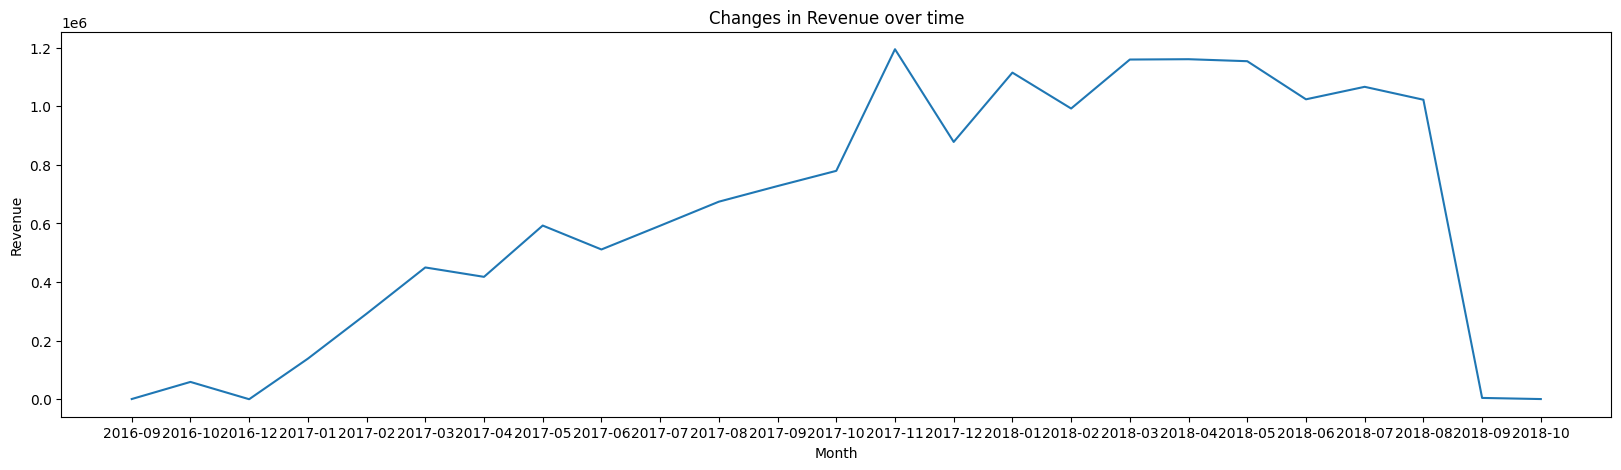

In [43]:

plt.figure(figsize=(20,5))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Changes in Revenue over time")
plt.show()

<Axes: xlabel='Month-Year'>

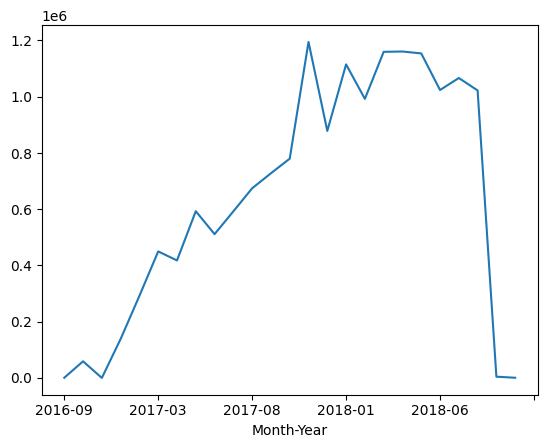

In [44]:
monthly_revenue.plot()

# How many orders were placed on Olist and how does it change by month or season

Total number of orders placed on Olist : 99441.00
Graph showimg the changes in orders by months:


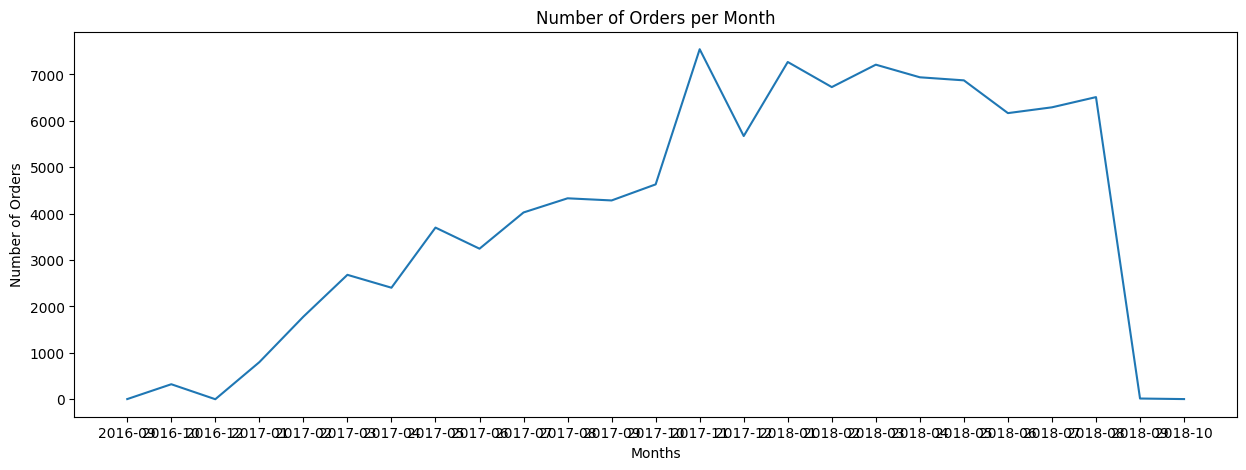

In [ ]:
total_orders = order_df["order_id"].count()
print(f"Total number of orders placed on Olist : {total_orders:.2f}")

order_df["order_purchase_timestamp"] =pd.to_datetime(order_df["order_purchase_timestamp"])

import datetime as dt

order_df['Year_Month'] = order_df["order_purchase_timestamp"].dt.strftime("%Y-%m")



monthly_order = order_df.groupby("Year_Month")["order_id"].count()
print("Graph showimg the changes in orders by months:")

import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(monthly_order.index, monthly_order.values)
plt.xlabel("Months")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Month")

plt.show()

# What are the most popular product categories on Olist,and how do their sales volumes compare to each other?

In [ ]:
#Comparism of Sales volumes of most popular product category.

sales_volume = product_df.groupby("product_category_name")["product_id"].count().reset_index()
popular_category = sales_volume.sort_values(by = "product_id", ascending=False)
most_popular_category = popular_category.head(20)
most_popular_category

,product_category_name,product_id
13,cama_mesa_banho,3087
32,esporte_lazer,2916
54,moveis_decoracao,2719
11,beleza_saude,2490
72,utilidades_domesticas,2381
8,automotivo,1941
44,informatica_acessorios,1653
12,brinquedos,1442
66,relogios_presentes,1365
70,telefonia,1158


#Average Order Value (AOV) on the Olist and how it changes by product category or payment method

In [ ]:
#load the payment and order dataset
payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year,Month,Month-Year,Year_Month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,October,2017-10,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,July,2018-07,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,August,2018-08,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,November,2017-11,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,February,2018-02,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017,March,2017-03,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018,February,2018-02,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017,August,2017-08,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018,January,2018-01,2018-01


In [ ]:
#merge the payment and order datasets
payment_order_df = pd.merge(payment_df, order_df, on = "order_id" , how = "left")

#Calculate the AOV
aov = payment_order_df["payment_value"].sum() / payment_order_df["order_id"].nunique()
print(f"The Average Order Value on Olist is ${aov:.2f}")

The Average Order Value on Olist is $160.99


In [ ]:
# Changes in AOV with payment method
revenue_by_payment_method = payment_order_df.groupby("payment_type")["payment_value"].sum()
order_by_payment_method = payment_order_df.groupby("payment_type")["order_id"].nunique()
aov_by_payment_method = revenue_by_payment_method/order_by_payment_method
print("The Average Order Value by payment method is :")
aov_by_payment_method.sort_values(ascending= False)

The Average Order Value by payment method is :


payment_type
credit_card    163.938098
boleto         145.034435
debit_card     142.663475
voucher         98.147147
not_defined      0.000000
dtype: float64

In [ ]:
#Changes in AOV with product category
#merge the payment_order_df, order_item dataset, and product datasets 
payment_order_item_df = pd.merge(payment_order_df, item_df, on = "order_id", how = "right")
payment_order_item_product_df = pd.merge(payment_order_item_df, product_df, on = "product_id", how = "right")

#Calculate the AOV by product category 
revenue_by_category = payment_order_item_product_df.groupby("product_category_name")["payment_value"].sum()
revenue_by_category
order_by_category = payment_order_item_product_df.groupby("product_category_name")["order_id"].nunique()
aov_by_category =(revenue_by_category /order_by_category).sort_values(ascending = False)
print("The Average Order Value by product category on Olist is :")
aov_by_category

The Average Order Value by product category on Olist is :


product_category_name
pcs                              1542.108011
telefonia_fixa                    927.543571
agro_industria_e_comercio         640.840914
portateis_casa_forno_e_cafe       537.079802
eletrodomesticos_2                526.201765
                                    ...     
artes_e_artesanato                 98.739200
fashion_roupa_infanto_juvenil      98.208750
livros_tecnicos                    95.921341
flores                             76.310690
casa_conforto_2                    71.272500
Length: 73, dtype: float64

#How many sellers are on the Olist and how it changes overtime

In [ ]:
#merge the order_item dataset with order dataset
order_item_df = pd.merge(order_df, item_df, on = "order_id", how= "inner")
order_item_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year,Month,Month-Year,Year_Month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,October,2017-10,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,July,2018-07,2018-07,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,August,2018-08,2018-08,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,November,2017-11,2017-11,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,February,2018-02,2018-02,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018,February,2018-02,2018-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017,August,2017-08,2017-08,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018,January,2018-01,2018-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018,January,2018-01,2018-01,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [ ]:
#Number of sellers active on the Olist
active_sellers = order_item_df["seller_id"].nunique()
print(f"The number of Active sellers on Olist is {active_sellers:.2f}")

The number of Active sellers on Olist is 3095.00


In [ ]:
#Changes in Number of Active sellers over time
seller_changes = order_item_df.groupby("Month-Year")["seller_id"].nunique()
seller_changes

Month-Year
2016-09       3
2016-10     143
2016-12       1
2017-01     227
2017-02     427
2017-03     499
2017-04     506
2017-05     583
2017-06     539
2017-07     606
2017-08     708
2017-09     731
2017-10     776
2017-11     965
2017-12     861
2018-01     970
2018-02     947
2018-03     996
2018-04    1123
2018-05    1115
2018-06    1175
2018-07    1261
2018-08    1278
2018-09       1
Name: seller_id, dtype: int64

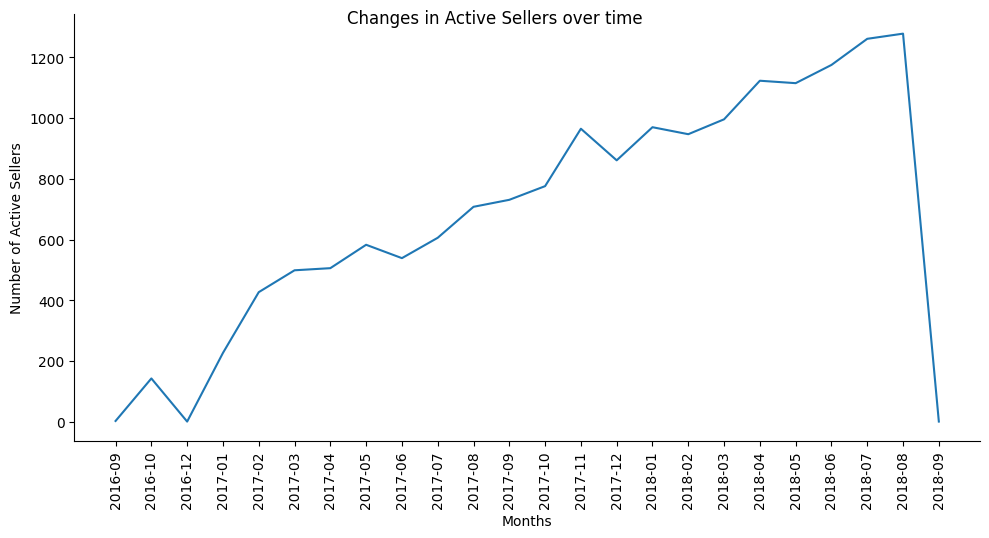

In [ ]:

g = sns.relplot(x = seller_changes.index, y = seller_changes.values, data = seller_changes, kind = "line", height = 5, aspect= 2 )
plt.xticks(rotation= 90)
g.fig.suptitle("Changes in Active Sellers over time")
g.set(xlabel = "Months", ylabel = "Number of Active Sellers")
plt.show()

#Distribution of seller ratings on the Olist

In [ ]:
#load the review data set
review_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02
...,...,...,...,...,...,...,...
99962,47e0954e156dac6512c25c6d2ecc1c66,16cbf959cfdb88c47ee2a29303547ec2,5,Nota máxima!,"Muito obrigado,\r\n\r\nExcelente atendimento,b...",2018-05-22 00:00:00,2018-05-23 00:51:43
99967,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado!,2018-07-04 00:00:00,2018-07-05 00:25:13
99971,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"Ficamos muito satisfeitos com o produto, atend...",2018-06-30 00:00:00,2018-07-02 23:09:35
99972,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05 00:00:00,2018-06-06 10:52:19


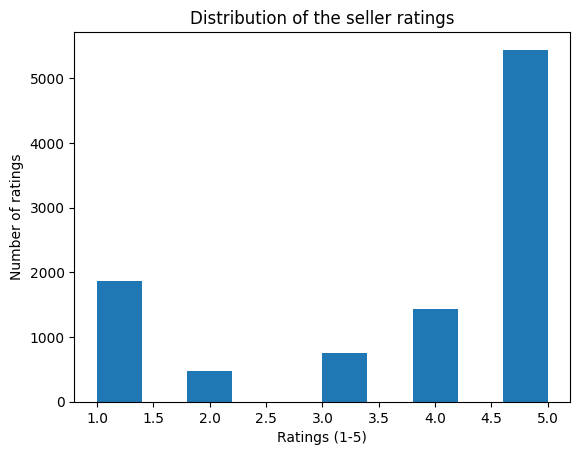

In [ ]:
#Show the distribution of the review score on histogram
fig, ax = plt.subplots()
ax.hist(review_df["review_score"])
ax.set_title("Distribution of the seller ratings")
ax.set_xlabel("Ratings (1-5)")
ax.set_ylabel("Number of ratings")
plt.show()

In [ ]:
#Impact of the ratings on sales performance

#How many Customers have made repeat Purchase and their percentage of total sales

In [ ]:
# Number of customers that have made repeat Purchase
len(order_df)

99441

In [ ]:
customer_df["customer_id"].nunique()

99441

In [ ]:
print("Since the number of customers and the lenght of the datasets are equal, there is No repeat Purchases by the customers")

Since the number of customers and the lenght of the datasets are equal, there is No repeat Purchases by the customers


#Average Customer ratings and its influence on sales performance

The average Customer rating on Olist is 3.81


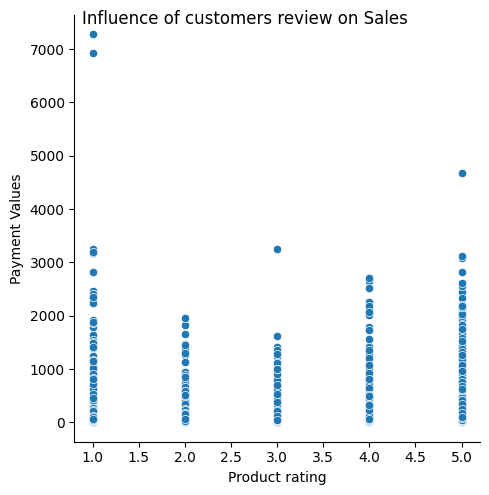

In [ ]:

#merge the review and order dataset
payment_review_df= pd.merge(review_df, payment_df, on = "order_id")

#Calculate the average review
avr_review = payment_review_df["review_score"].mean()
print(f"The average Customer rating on Olist is {avr_review:.2f}")

#Influece of Customer ratings on sales
g = sns.relplot(x = "review_score",y = "payment_value", data = payment_review_df)
g.fig.suptitle("Influence of customers review on Sales")
g.set(xlabel ="Product rating", ylabel ="Payment Values")

plt.show()

#Average order cancellation rate and its impact on sales

In [ ]:
#Load the order datasets
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year,Month,Month-Year,Year_Month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,October,2017-10,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,July,2018-07,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,August,2018-08,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,November,2017-11,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018,February,2018-02,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017,March,2017-03,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018,February,2018-02,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017,August,2017-08,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018,January,2018-01,2018-01


In [ ]:
order_df["order_status"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
cancelled_order_df = order_df[order_df["order_status"] == "canceled"]
cancelled_order = cancelled_order_df["order_status"].shape[0]

In [ ]:
# Order cancellation rate 
order_cancellation_rate = (cancelled_order/order_df["order_status"].shape[0]) * 100
print(f"The average order cancellation rate is {order_cancellation_rate:.2f}%")

The average order cancellation rate is 0.63%


#Which product is top selling and it's changes over time

In [ ]:
#merge the order_item_df with the product datasets
order_item_product_df = pd.merge(order_item_df, product_df, on = "product_id")
order_item_product_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year,Month,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,October,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,2017,August,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,2017,August,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,2017,October,...,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018,July,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,2017,August,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,2017,August,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,2017,December,...,55.90,15.14,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017,March,...,72.00,13.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0


In [ ]:
#top selling products
top_selling_products = order_item_product_df["product_category_name"].value_counts().head(10)
print("The top selling products on Olist are")
top_selling_products

The top selling products on Olist are


cama_mesa_banho           11249
beleza_saude               9818
esporte_lazer              8730
moveis_decoracao           8475
informatica_acessorios     7850
utilidades_domesticas      7142
relogios_presentes         6067
telefonia                  4600
ferramentas_jardim         4366
automotivo                 4319
Name: product_category_name, dtype: int64

In [ ]:
product = top_selling_products.index
product

Index(['cama_mesa_banho', 'beleza_saude', 'esporte_lazer', 'moveis_decoracao',
       'informatica_acessorios', 'utilidades_domesticas', 'relogios_presentes',
       'telefonia', 'ferramentas_jardim', 'automotivo'],
      dtype='object')

In [ ]:
top_product_df =order_item_product_df[order_item_product_df["product_category_name"].isin(product)]
top_product_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year,Month,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,October,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,2017,August,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,2017,August,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,2017,October,...,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
110,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018,August,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112644,87b4c933f31145a28413b39d880ad6c3,ddfdf5e9b2659e1fbd073404c9b762e0,delivered,2018-03-02 17:12:05,2018-03-02 17:49:24,2018-03-06 21:23:32,2018-03-16 17:21:55,2018-03-21 00:00:00,2018,March,...,57.99,27.26,beleza_saude,50.0,1031.0,1.0,350.0,19.0,12.0,13.0
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,2017,August,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,2017,August,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017,March,...,72.00,13.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0


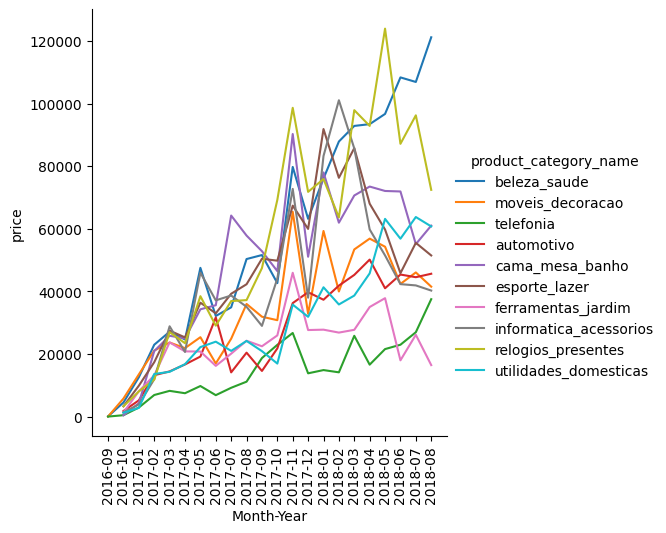

In [ ]:
sales_top_product =top_product_df.groupby(["Month-Year", "product_category_name"])["price"].sum().reset_index()
sales_top_product
g = sns.relplot(x = "Month-Year", y = "price", data = sales_top_product, kind = "line", hue = "product_category_name")
plt.xticks(rotation= 90)
plt.show()

#Frequently used payment method and its variation with product category or geographic region

In [ ]:

#Load payment data set
payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
freq_pay_mtd = payment_df["payment_type"].mode()

In [ ]:
#Variation of the most frequent payment method with product category
# merge payment, order_item and payment dataset
payment_item_df = pd.merge(payment_df, item_df, on = "order_id")
payment_item_product_df = pd.merge(payment_item_df, product_df, on = "product_id")
payment_item_product_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,13.92,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
4,1966886b80f14d0588adf6406afb0026,1,debit_card,1,68.89,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-09-01 16:06:59,56.99,11.90,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,6a87a0371f263aa8c1779c2c115c1427,1,credit_card,2,83.09,1,1f58e3c365e615b33b2b30b068d7578a,2a5b78b41cd05baeac8df54c6606b92c,2017-11-30 16:13:44,74.82,8.27,beleza_saude,58.0,813.0,1.0,600.0,20.0,10.0,15.0
117597,e0657085c2b6297a32f39efa200cdf72,1,credit_card,1,26.37,1,e2336d327209ca849dca5afda036f842,a8739afb32aaa45e01815ca76f76f54b,2018-08-07 21:24:28,18.98,7.39,eletronicos,38.0,459.0,1.0,250.0,18.0,19.0,18.0
117598,9ac048d7ffebba67d54456aa9ec07d7e,1,credit_card,1,60.69,1,0dcb1adbafdcc389972874b01fa249b8,2f74af7a0ee5636f12c2336f9fffed47,2017-11-24 19:09:29,44.90,15.79,esporte_lazer,39.0,411.0,3.0,350.0,23.0,23.0,23.0
117599,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,1,fea2f92877b647dc07ea8e3f4aa2cf3f,406822777a0b9eb5c50e442dd4cd3ec5,2018-05-22 12:30:57,179.80,19.14,brinquedos,35.0,537.0,2.0,7400.0,45.0,29.0,53.0


In [ ]:
freq_pay_mtd_df = payment_item_product_df[payment_item_product_df["payment_type"] == "credit_card"]
freq_pay_mtd_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,13.92,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
5,6df674fd09d933a85574460e32a94e23,1,credit_card,2,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2018-02-22 17:50:33,56.99,8.72,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,6a87a0371f263aa8c1779c2c115c1427,1,credit_card,2,83.09,1,1f58e3c365e615b33b2b30b068d7578a,2a5b78b41cd05baeac8df54c6606b92c,2017-11-30 16:13:44,74.82,8.27,beleza_saude,58.0,813.0,1.0,600.0,20.0,10.0,15.0
117597,e0657085c2b6297a32f39efa200cdf72,1,credit_card,1,26.37,1,e2336d327209ca849dca5afda036f842,a8739afb32aaa45e01815ca76f76f54b,2018-08-07 21:24:28,18.98,7.39,eletronicos,38.0,459.0,1.0,250.0,18.0,19.0,18.0
117598,9ac048d7ffebba67d54456aa9ec07d7e,1,credit_card,1,60.69,1,0dcb1adbafdcc389972874b01fa249b8,2f74af7a0ee5636f12c2336f9fffed47,2017-11-24 19:09:29,44.90,15.79,esporte_lazer,39.0,411.0,3.0,350.0,23.0,23.0,23.0
117599,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,1,fea2f92877b647dc07ea8e3f4aa2cf3f,406822777a0b9eb5c50e442dd4cd3ec5,2018-05-22 12:30:57,179.80,19.14,brinquedos,35.0,537.0,2.0,7400.0,45.0,29.0,53.0


In [ ]:
freq_pay_mtd_df.isnull().sum()

order_id                      0
payment_sequential            0
payment_type                  0
payment_installments          0
payment_value                 0
order_item_id                 0
product_id                    0
seller_id                     0
shipping_limit_date           0
price                         0
freight_value                 0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
var_pay_cat = payment_item_product_df.groupby(["product_category_name", "payment_type"])["payment_type"].count()
var_pay_cat

product_category_name      payment_type
agro_industria_e_comercio  boleto            60
                           credit_card      148
                           debit_card         5
                           voucher           44
alimentos                  boleto           106
                                           ... 
telefonia_fixa             voucher           10
utilidades_domesticas      boleto          1357
                           credit_card     5555
                           debit_card       114
                           voucher          521
Name: payment_type, Length: 270, dtype: int64

#Product category with highest profit margin

In [113]:
#merge the product datasets and payment dataset
product_item_df = pd.merge(product_df, item_df, on = "product_id")
product_item_payment_df = pd.merge(product_item_df, payment_df, on ="order_id")
pay_price_cat = product_item_payment_df.groupby("product_category_name").agg( {"payment_value" : "sum", "price" :"sum"})
#profit_margin= (product_item_payment_df["payment_value"] - product_item_payment_df["price"])/product_item_payment_df["payment_value"]
pay_price_cat["profit_margin"] =( pay_price_cat["payment_value"] - pay_price_cat["price"]) / pay_price_cat["payment_value"]

print("product category with highest profit margin are:")
pay_price_cat.sort_values(by = "profit_margin", ascending = False).head(10)

product category with highest profit margin are:


,payment_value,price,profit_margin
product_category_name,,,
telefonia_fixa,207769.76,62266.68,0.700309
sinalizacao_e_seguranca,69221.67,21874.76,0.683990
bebidas,71528.14,22945.55,0.679209
fraldas_higiene,4221.25,1567.59,0.628643
moveis_escritorio,649882.90,287140.22,0.558166
casa_conforto_2,1710.54,773.17,0.547997
artigos_de_natal,19176.89,8881.44,0.536868
flores,2213.01,1110.04,0.498403
moveis_sala,136386.11,73174.55,0.463475


#Geoloation Having highest customer density

In [25]:
#merge geolocation dataset and customer dataset together 
order_cust_df = pd.merge(order_df, customer_df, on = "customer_id", how = "inner")
order_cust_geo_df = pd.merge(order_cust_df, geo_df,  left_on ="customer_zip_code_prefix", right_on = "geolocation_zip_code_prefix", how = "left")
order_cust_geo_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.575033,-46.587451,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.580054,-46.586673,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15083728,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,83750.0,-25.762064,-49.720313,lapa,PR
15083729,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,83750.0,-25.758551,-49.722177,lapa,PR
15083730,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,83750.0,-25.757450,-49.713800,lapa,PR
15083731,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,83750.0,-25.774218,-49.737533,lapa,PR


In [26]:
cust_density = order_cust_geo_df.groupby(["geolocation_lat","geolocation_lng"])["customer_id"].nunique().reset_index().sort_values("customer_id", ascending= False)
cust_density

,geolocation_lat,geolocation_lng,customer_id
334508,-22.902263,-43.109812,196
333759,-22.903533,-43.115982,196
335950,-22.899404,-43.108537,184
336028,-22.899254,-43.110810,184
335992,-22.899325,-43.108217,184
...,...,...,...
537912,-19.831596,-43.867450,1
84094,-25.497272,-54.579502,1
656735,-7.866568,-45.207586,1
656736,-7.866372,-37.976657,1
